# Hong Kong Pollution: Causeway Bay Exploratory Data Analysis
  
**The Data Science Method**  


0.   Problem Identification 

1.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
2.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

3.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
4.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

5.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Load Required Python Packages

In [1]:
# load python packages from environment
import os
import urllib.request
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<b>Locate and print current working directory.</b>

In [2]:
path = os.getcwd()
parent = os.path.dirname(path)
print(path)
print(parent)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/notebooks
/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution


<b>Get parent directory and append path to processed data.</b>

In [3]:
# Create raw data path by getting parent directory of current working directory and appending data/processed
parent_path = os.path.dirname(path)
data_path = os.path.join(parent_path, 'data', 'interim')
print(data_path)

/Users/tiffanyflor/Dropbox/MyProjects/HongKongPollution/HongKongPollution/data/interim


In [4]:
os.listdir(data_path)

['monthly_pollution_2014_2020.csv',
 'daily_max_pollution.csv',
 'hourly_pollution.csv',
 '.gitkeep',
 'pollution_monthly_min_2014_2020.csv',
 '1.4_cwb_pollution_monthly_max.csv',
 'pollution_monthly_max_2014_2020.csv',
 '1.4_cwb_pollution_daily_max.csv',
 'joined_weather_pollution_all_districts.csv',
 'cleaned_weather_2014_2020.csv']

## Load CWB Pollution Data into DataFrame

In [5]:
df = pd.read_csv(data_path+'/1.4_cwb_pollution_monthly_max.csv')
df.head()

,Date,Causeway Bay
0,2014-01-31,8.1
1,2014-02-28,5.7
2,2014-03-31,6.7
3,2014-04-30,6.2
4,2014-05-31,5.3


In [7]:
df = df.rename(columns={'Causeway Bay':'Average Max AQHI'})
df.columns

Index(['Date', 'Average Max AQHI'], dtype='object')

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [10]:
df.head()

,Date,Average Max AQHI,Month,Year
0,2014-01-31,8.1,1,2014
1,2014-02-28,5.7,2,2014
2,2014-03-31,6.7,3,2014
3,2014-04-30,6.2,4,2014
4,2014-05-31,5.3,5,2014


## Set index to datetime

In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2014-01-31 to 2020-12-31
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Max AQHI  84 non-null     float64
 1   Month             84 non-null     int64  
 2   Year              84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.6 KB


In [13]:
df.head()

,Average Max AQHI,Month,Year
Date,,,
2014-01-31,8.1,1,2014
2014-02-28,5.7,2,2014
2014-03-31,6.7,3,2014
2014-04-30,6.2,4,2014
2014-05-31,5.3,5,2014


In [14]:
df.columns

Index(['Average Max AQHI', 'Month', 'Year'], dtype='object')

### Examine Pollution Summary Statistics

In [15]:
df.shape

(84, 3)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Max AQHI,84.0,5.264286,0.890870,3.0,4.60,5.3,5.80,8.1
Month,84.0,6.500000,3.472786,1.0,3.75,6.5,9.25,12.0
Year,84.0,2017.000000,2.012012,2014.0,2015.00,2017.0,2019.00,2020.0


## Build data profile tables and plots

Mean Monthly Average Max AQHI: 5.26
Median Monthly Average Max AQHI: 5.3


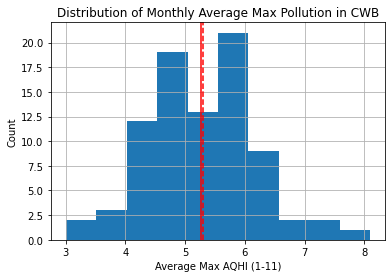

In [17]:
df['Average Max AQHI'].hist()
plt.title('Distribution of Monthly Average Max Pollution in CWB')
plt.axvline(df['Average Max AQHI'].mean(),color='red')
plt.axvline(df['Average Max AQHI'].median(),color='red',linestyle='--')
plt.xlabel('Average Max AQHI (1-11)')
plt.ylabel('Count')

print('Mean Monthly Average Max AQHI: {}'.format(round(df['Average Max AQHI'].mean(),2)))
print('Median Monthly Average Max AQHI: {}'.format(round(df['Average Max AQHI'].median(),2)))

## Anamolies & Outliers

Text(0.5, 1.0, 'Monthly Trend 2014-2020')

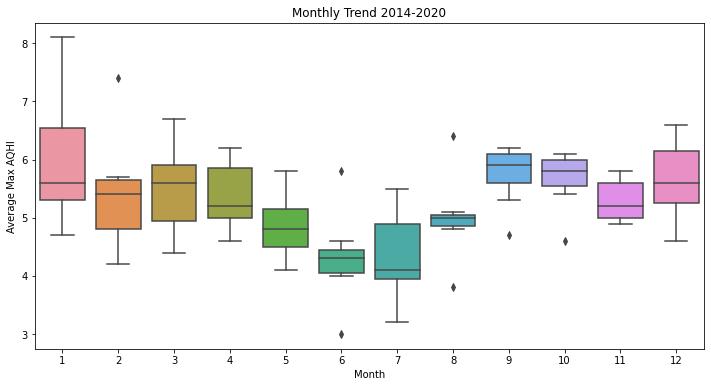

In [29]:
# Visualize the monthly trend
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='Average Max AQHI', data=df)
plt.title('Monthly Trend 2014-2020')

Text(0.5, 1.0, 'Yearly Trend')

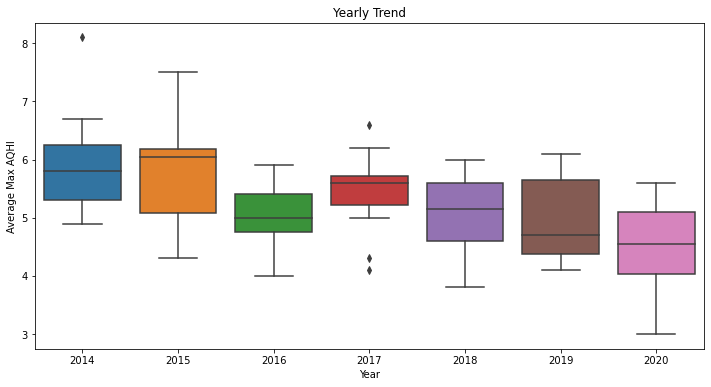

In [30]:
# Visualize the yearly trend
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Average Max AQHI', data=df)
plt.title('Yearly Trend')

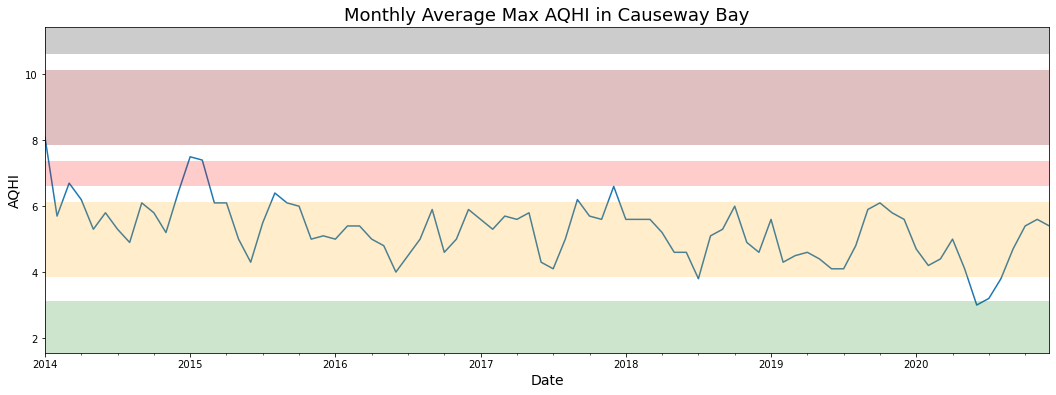

In [34]:
fig = df['Average Max AQHI'].plot(figsize=(18,6),legend=False).get_figure()
plt.title('Monthly Average Max AQHI in Causeway Bay', size=18)
plt.axhline(y=2, lw=75, color='green', alpha=0.2) # Low (1-3)
plt.axhline(y=5, lw=75, color='orange', alpha=0.2) # Moderate (4-6)
plt.axhline(y=7, lw=25, color='red', alpha=0.2) # High (7)
plt.axhline(y=9, lw=75, color='maroon', alpha=0.25) # Very High (8-10)
plt.axhline(y=11, lw=26, color='black', alpha=0.2) # Serious(11)
plt.ylabel('AQHI', size=14)
plt.xlabel('Date', size=14)

fig.savefig(parent+'/visualizations/monthly_average_max_aqhi_causewaybay_color.jpg')


The shaded areas in the graph represents the various levels on the AQHI scale. As can be seen in the timeseries line graph and the monthly trend boxplots, the summer months have a seasonal drop in AQHI level. This suggests that summertime is a better time to visit for individuals who suffer from pollution irritated respiratory issues. We also notice a general downward trend in AQHI rating over the last few years.

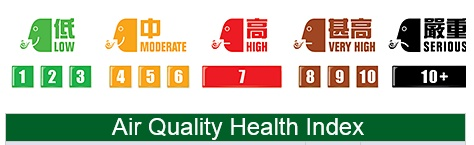

In [35]:
from IPython.display import Image
aqhi_image = parent_path + '/visualizations/hk_aqhi.jpg'
Image(aqhi_image)

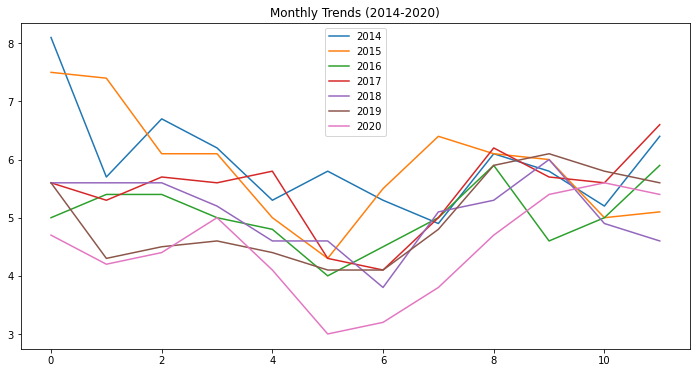

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df.loc['2014']['Average Max AQHI'].values)
ax.plot(df.loc['2015']['Average Max AQHI'].values)
ax.plot(df.loc['2016']['Average Max AQHI'].values)
ax.plot(df.loc['2017']['Average Max AQHI'].values)
ax.plot(df.loc['2018']['Average Max AQHI'].values)
ax.plot(df.loc['2019']['Average Max AQHI'].values)
ax.plot(df.loc['2020']['Average Max AQHI'].values)
plt.title('Monthly Trends (2014-2020)')
plt.legend(['2014','2015','2016','2017','2018','2019','2020'])
#plt.xticks(range(len(data15)), data15.index.to_series().dt.strftime('%b'), size='small')

In [59]:
a = round(df.groupby(df['Month']).mean(),1).drop('Year',axis=1)
a
#b = df.groupby(df['Date Period'].dt.strftime('%m'))[['Mean Air Temp (C°)']].mean()
#c = df.groupby(df['Date Period'].dt.strftime('%m'))[['Central']].mean()

#pd.concat([a,b,c],axis=1)

,Average Max AQHI
Month,
1,6.0
2,5.4
3,5.5
4,5.4
5,4.9
6,4.3
7,4.4
8,5.0
9,5.7


In [82]:
df_monthly = pd.DataFrame({
    'Month':['January','February','March','April','May','June','July','August','September','October','November','December'],
    '2014':list(df['2014']['Average Max AQHI']),
    '2015':list(df['2015']['Average Max AQHI']),
    '2016':list(df['2016']['Average Max AQHI']),
    '2017':list(df['2017']['Average Max AQHI']),
    '2018':list(df['2018']['Average Max AQHI']),
    '2019':list(df['2019']['Average Max AQHI']),
    '2020':list(df['2020']['Average Max AQHI']),
    })
df_monthly.set_index('Month',inplace=True)
df_monthly

,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,
January,8.1,7.5,5.0,5.6,5.6,5.6,4.7
February,5.7,7.4,5.4,5.3,5.6,4.3,4.2
March,6.7,6.1,5.4,5.7,5.6,4.5,4.4
April,6.2,6.1,5.0,5.6,5.2,4.6,5.0
May,5.3,5.0,4.8,5.8,4.6,4.4,4.1
June,5.8,4.3,4.0,4.3,4.6,4.1,3.0
July,5.3,5.5,4.5,4.1,3.8,4.1,3.2
August,4.9,6.4,5.0,5.0,5.1,4.8,3.8
September,6.1,6.1,5.9,6.2,5.3,5.9,4.7


In [83]:
df_monthly.diff()

,2014,2015,2016,2017,2018,2019,2020
Month,,,,,,,
January,NaN,NaN,NaN,NaN,NaN,NaN,NaN
February,-2.4,-0.1,0.4,-0.3,0.0,-1.3,-0.5
March,1.0,-1.3,0.0,0.4,0.0,0.2,0.2
April,-0.5,0.0,-0.4,-0.1,-0.4,0.1,0.6
May,-0.9,-1.1,-0.2,0.2,-0.6,-0.2,-0.9
June,0.5,-0.7,-0.8,-1.5,0.0,-0.3,-1.1
July,-0.5,1.2,0.5,-0.2,-0.8,0.0,0.2
August,-0.4,0.9,0.5,0.9,1.3,0.7,0.6
September,1.2,-0.3,0.9,1.2,0.2,1.1,0.9


## Identification of Features

In [86]:
df['Average Max AQHI'].head()

Date
2014-01-31    8.1
2014-02-28    5.7
2014-03-31    6.7
2014-04-30    6.2
2014-05-31    5.3
Name: Average Max AQHI, dtype: float64

We'll be using the datetime as the input variable and output will be AQHI level.

## Save DataFrame

In [87]:
df.to_csv(data_path + '/2.2_cwb_pollution_monthly_avg_max_timeseries.csv')